# Forest-Guided Clustering Tutorial

This tutorial is an introduction on how to use the Forest-Guided Clustering python package to interpret your Random Forest model. We will show you:

1. how to install the Forest-Guided Clustering package
2. how to apply the Forest-Guided Clustering package to your trained Random Forest model
3. how to use the output visualizations for interpretation of your Random Forest model


Note: the Forest-Guided Clustering method identifies the features that guide the decision making process of the Random Forest model. If the trained Random Forest model shows a poor performance, e.g. accuracy of 70% or lower, and therefore, makes poor decisions, the retrieved feature importance might not reflect the true underlying structures in the data.


## Installation

To use the Forest-Guided Clustering you have to install the fgclustering package first.

**Installation of the fgclustering package via PyPi:**

```pip install fgclustering```

**Installation of the fgclustering package via pip from source:**

Clone the git repo: ```git clone https://github.com/HelmholtzAI-Consultants-Munich/forest_guided_clustering.git``` and install the downloaded package with:

```pip install .        (Installation as python package: run inside directory)```

or if you want to develop the package:

```pip install -e .        (Installation as python package: run inside directory)```

Note: if you are using conda, first install pip with: ```conda install pip```

## Import

In [1]:
import warnings
warnings.filterwarnings("ignore")
## Import the Forest-Guided Clustering package
from fgclustering import fgclustering

## Additional imports for use-cases
import joblib
import pandas as pd

## Example for Forest-Guided Clustering on binary-classification Random Forest model

The first use-case is a simple binary classification Random Forest model. The Random Forest classifier is trained based on the Breast Cancer dataset from ```sklearn.datasets``` (for more details please see descrption [here](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset)). This dataset contains 569 samples of 212 malignant (class 0) and 357 benign (class 1) tumors. The tumors are described by 30 numeric features computed from a digitized image taken of breast mass. We trained a Random Forest Classifier on the whole dataset and tuned the hyperparameters via 5 fold cross-validation, where we optimized the parameters: ```max_depth``` and ```max_samples```. The Out-of-Bag accuracy of the tuned prediction model is 96%. 

In [2]:
data_breast_cancer = pd.read_csv('./data/data_breast_cancer.csv')
rf = joblib.load(open('./data/random_forest_breat_cancer.joblib', 'rb'))

To understand, which features play an important role for the classification of tumors into malignant and benign, we apply the Forest-Guided Clustering method. We use the loaded pre-processed breast cancer dataset and trained Random Forest Classifier as input for the ```fgclustering``` function. In addition, we define the prefix of the output plots  (```output``` parameter) and indicate, which column of the dataset contains the target values (```target_column``` parameter, this parameter can also be the vector of target values, which then should be removed from the dataset). All other parameters are optional:

- ```max_K```: Maximum number of clusters for cluster score computation, defaults to 6
- ```number_of_clusters```: Number of clusters for the k-medoids clustering. Leave None if number of clusters should be optimized, defaults to None
- ```max_iter_clustering```: Number of iterations for k-medoids clustering, defaults to 500
- ```bootstraps_JI```: Number of bootstraps to compute the Jaccard Index, defaults to 300
- ```discart_value_JI```: Minimum Jaccard Index for cluster stability, defaults to 0.6 
- ```bootstraps_p_value```: Number of bootstraps to compute the p-value of feature importance, defaults to 10000
- ```thr_pvalue```: P-value threshold for feature filtering, defaults to 0.05
- ```random_state```: Seed number for random state, defaults to 42

If you run the ```fgclustering``` function, it will return you the optimal number of clusters, based on a scoring function that consideres the class mixture of the cluster, the so-called *score* and the cluster stability, the so-called *Jaccard Index*. The lower the *score* the better the seperation of target values between cluster (e.g. low class-mixture within one cluster but instead only values from one class in each cluster). The lower the *Jaccard Index* the lower the cluster stability, e.g. if we repeat the clustering on a subsample of the original dataset we will get a very different clustering. The *Jaccard Index* returns values between 0 (instable) and 1 (stable), where 0.6 is suggested as a good cutoff for stability, i.e. clusterings with a *Jaccard Index* > 0.6 are considered as stable (see [Read the Docs documentation](https://forest-guided-clustering.readthedocs.io/en/latest/) for further explanations). 

Furthermore, you will get three different plots: 

- heatmap: overview on target values attribution and feature enrichment / depletion for each cluster
- boxplot: distribution of target and feature values per cluster
- barplot: feature importance per cluster 

Note: we only plot those features that show a significant difference between clusters according to a ANOVA or Chi-Square test

Interpreting RandomForestClassifier


 17%|█▋        | 1/6 [01:19<06:35, 79.02s/it]

For number of cluster 2 the Jaccard Index is 0.9929509674111024
For number of cluster 2 the score is 0.06075601429195926


 33%|███▎      | 2/6 [03:35<07:30, 112.59s/it]

For number of cluster 3 the Jaccard Index is 0.9595055151689406
For number of cluster 3 the score is 0.16715848101924288


 50%|█████     | 3/6 [05:42<05:57, 119.30s/it]

For number of cluster 4 the Jaccard Index is 0.7651890909363529
For number of cluster 4 the score is 0.11800660882985625


 67%|██████▋   | 4/6 [09:56<05:45, 172.67s/it]

For number of cluster 5 the Jaccard Index is 0.7336070159687202
For number of cluster 5 the score is 0.0937287660151763


 83%|████████▎ | 5/6 [15:51<03:58, 238.37s/it]

For number of cluster 6 the Jaccard Index is 0.7163356963349595
For number of cluster 6 the score is 0.0898883258202708


100%|██████████| 6/6 [25:37<00:00, 256.23s/it]

For number of cluster 7 the Jaccard Index is 0.29331202354899133
Clustering is instable, no score computed!
The optimal number of clusters is 2
Visualizing forest guided clustering for 2 clusters


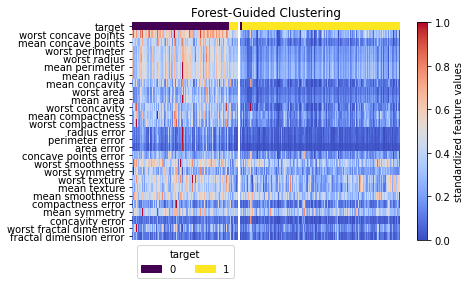

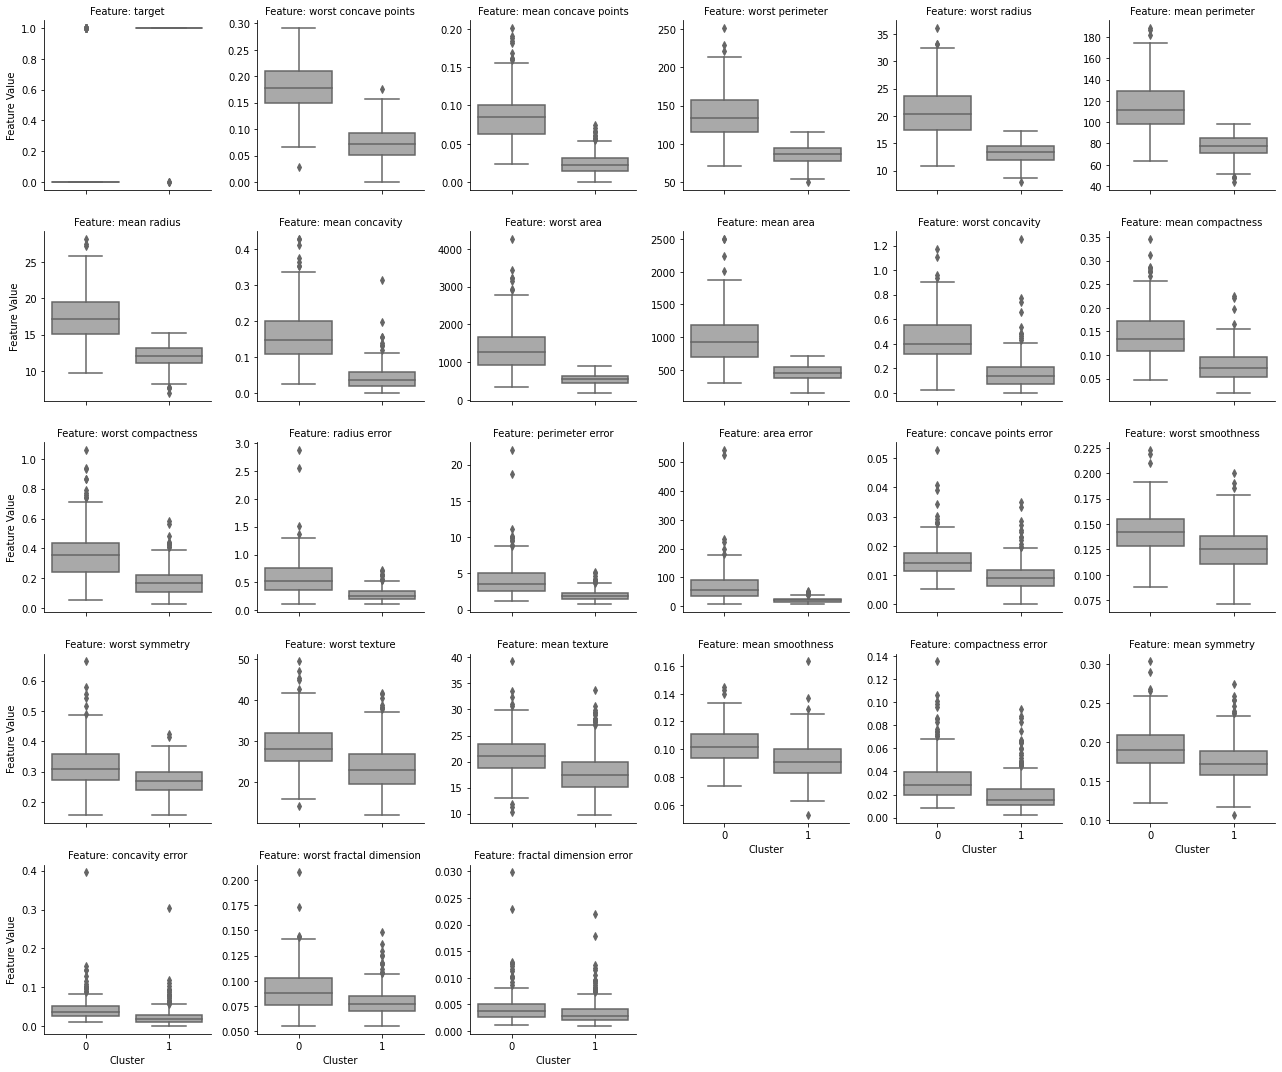

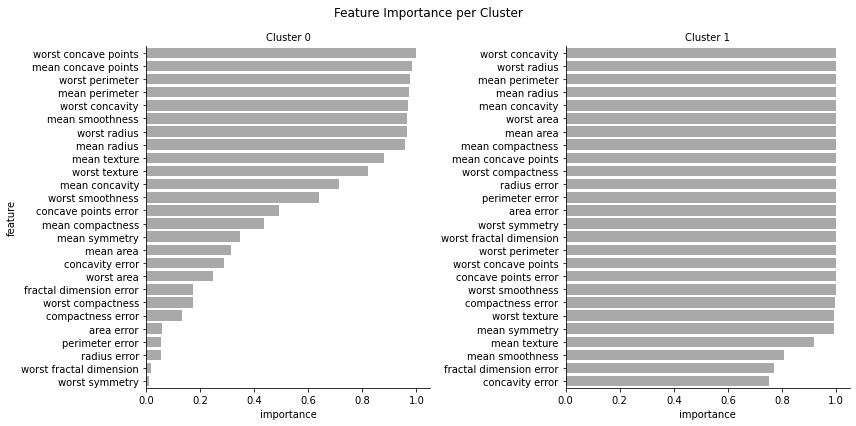

In [3]:
optimal_k = fgclustering(output='forest_guided_clustering_breastcancer', data=data_breast_cancer, target_column='target', model=rf,  
                         max_K = 8, number_of_clusters = None, max_iter_clustering = 1000, 
                         bootstraps_JI = 300, discart_value_JI = 0.6, 
                         bootstraps_p_value = 10000, thr_pvalue = 0.001, random_state = 42)

The return value of the ```fgclustering``` function is ```optimal_k=2```. We can see from the output above that *k=2* leads to the lowest *score* of 0.06 while having a *Jaccard Index* of 0.99, which means that the clustering is almost perfectly stable. Clusterings with k between 3 and 6 have stable clustering as well but higher scores, and hence, the seperation of target values between clusters is less god, e.g. higher class-mixture within a cluster. The clustering with 7 clusters has a *Jaccard Index* < 0.6 and hence is defined instable and not considered for the choice of the optimal k. 

The heatmap provides a first overview on the target value attribution and feature enrichment / depletion per cluster.  We can see which classes/target values fall into which cluster and samples that fall into the "wrong" cluster can be inspected further as they might be extreme outliers or wrongly labelled samples / measurement errors. The boxplots contain the same information as the heatmap just presented in a different way. Here the features are not standardized and we can see the actual scale of each feature on the y axis. Furthermore, we get an idea of the distribution of feature values within each cluster, e.g. having a small or high within cluster variation. The feature importance indicates if a feature shows a clear trend in a certain cluster. If the feature values in a certain cluster would be spread over the whole feature range, the feature would not be important for the interpretation of the clusters because it does not show any trend or pattern and hence, we would not be able to draw any clear conclusions from it.

From the resulting plots we can draw the following conclusions for malignent and benign tumors:
- the two classes are almost perfectly attributed to the two clusters. Only a few samples fall into the "wrong" cluster, which could be further inspectedto rule out labelling errors
- the top ranked features in the boxplots and feature importance show the biggest difference of feature values between cluster
- cluster 0 samples, have higher values for all important features than cluster 1 samples, i.e. malignent tumors have more worst concave points, a higher compactness and a larger radius and perimeter

## Example for Forest-Guided Clustering on multiclass-classification Random Forest model

The second use-case illustrates how Forest-Guided Clustering can be used to interpret a multi-class classiciation model. The Random Forest classifier is trained based on the Iris dataset from ```sklearn.datasets``` (for more details please see descrption [here](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset)). This dataset contains 150 samples, of each class 50 (Iris-Setosa, Iris-Versicolour, Iris-Virginica). The plants are described by 4 plant specific characteristics, encoded in numeric features. We trained a Random Forest Classifier on the whole dataset and tuned the hyperparameters via 5 fold cross-validation, where we optimized the parameters: ```max_depth``` and ```max_samples```. The Out-of-Bag accuracy of the tuned prediction model is 94%. 

In [4]:
data_iris = pd.read_csv('./data/data_iris.csv')
rf = joblib.load(open('./data/random_forest_iris.joblib', 'rb'))

To understand, which plant characteristics play an important role for the classification of the different Iris species, we apply the Forest-Guided Clustering method. We use the loaded pre-processed iris dataset and trained Random Forest Classifier as input for the ```fgclustering``` function. For description of the input parameters see binary classification example above.

Interpreting RandomForestClassifier


 17%|█▋        | 1/6 [00:00<00:02,  1.99it/s]

For number of cluster 2 the Jaccard Index is 0.9995959595959596
For number of cluster 2 the score is 0.25


 33%|███▎      | 2/6 [00:01<00:03,  1.23it/s]

For number of cluster 3 the Jaccard Index is 0.9853989489729048
For number of cluster 3 the score is 0.0841213837498657


 50%|█████     | 3/6 [00:02<00:02,  1.23it/s]

For number of cluster 4 the Jaccard Index is 0.7794569597069604
For number of cluster 4 the score is 0.1438279988151725


 67%|██████▋   | 4/6 [00:04<00:02,  1.24s/it]

For number of cluster 5 the Jaccard Index is 0.4478557183557183
Clustering is instable, no score computed!


 83%|████████▎ | 5/6 [00:05<00:01,  1.24s/it]

For number of cluster 6 the Jaccard Index is 0.6413495300995301
For number of cluster 6 the score is 0.12860082304526751


100%|██████████| 6/6 [00:07<00:00,  1.27s/it]

For number of cluster 7 the Jaccard Index is 0.6751111111111113
For number of cluster 7 the score is 0.14609653385163587
The optimal number of clusters is 3
Visualizing forest guided clustering for 3 clusters


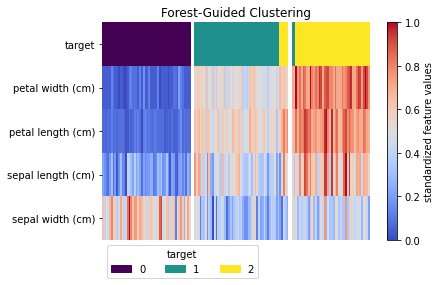

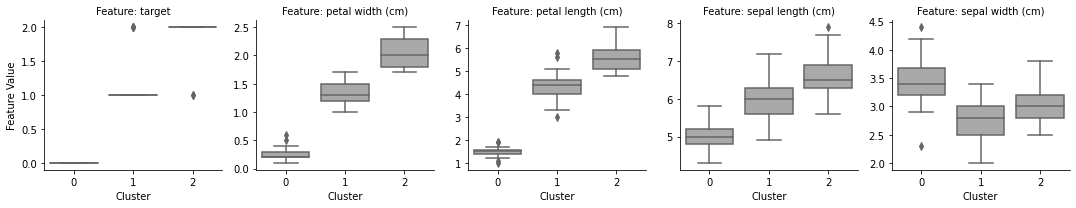

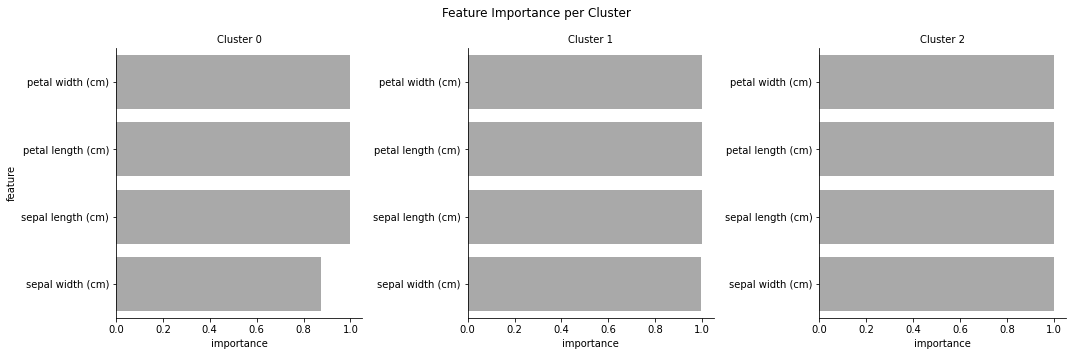

In [5]:
optimal_k = fgclustering(output='forest_guided_clustering_iris', data=data_iris, target_column='target', model=rf,  
                         max_K = 8, number_of_clusters = None, max_iter_clustering = 1000, 
                         bootstraps_JI = 300, discart_value_JI = 0.6, 
                         bootstraps_p_value = 100000, thr_pvalue = 0.001, random_state = 42)

The return value of the ```fgclustering``` function is ```optimal_k=3```. We can see from the output above that *k=3* leads to the lowest *score* while having a stable clustering.

From the resulting plots we can draw the following conclusions:

- the three classes are almost perfectly attributed to the three clusters. Only a few samples of class 1 and 2 fall into the "wrong" cluster, which could be further inspected
- all features are important for the clustering and show a clear trend within each cluster
- cluster 0, which contains only class 0 samples, is described by small petal width and length as well as sepal length but large sepal width
- cluster 1, which mainyl contains only class 1 samples, shows the oppposite pattern than cluster 0
- cluster 2, which contains only class 2 samples, is described by small sepal width but intermediate values for petal width and length as well as sepal length


## Example for Forest-Guided Clustering on regression Random Forest model
The thirs use-case illustrates how Forest-Guided Clustering can be used to interpret a regression model. The Random Forest Regressor is trained on the Boston Housing dataset from ```sklearn.datasets``` (for more details please see descrption [here](https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-house-prices-dataset)). This dataset contains 506 house prices, which are described by 12 numeric and one categorical feature. We trained a Random Forest Regressor on the whole dataset and tuned the hyperparameters via 5 fold cross-validation, where we optimized the parameters: ```max_depth``` and ```max_samples```. The Out-of-Bag MSE of the tuned prediction model is 0.57. 

In [6]:
data_boston = pd.read_csv('./data/data_boston.csv')
data_boston['CHAS'] = data_boston['CHAS'].astype('category')
rf = joblib.load(open('./data/random_forest_boston.joblib', 'rb'))

To understand the relation between housing prices and the provided features (e.g. tax, crime rate etc.), we apply the Forest-Guided Clustering method. We use the loaded pre-processed boston housing dataset and trained Random Forest Regressor as input for the ```fgclustering``` function. For further description of the input parameters see binary classification example above.

In [7]:
optimal_k = fgclustering(output='forest_guided_clustering_boston', data=data_boston, target_column='target', model=rf,  
                         max_K = 8, number_of_clusters = None, max_iter_clustering = 1000, 
                         bootstraps_JI = 300, discart_value_JI = 0.6, 
                         bootstraps_p_value = 100000, thr_pvalue = 0.001, random_state = 42)

Interpreting RandomForestRegressor


 17%|█▋        | 1/6 [02:53<14:26, 173.24s/it]

For number of cluster 2 the Jaccard Index is 0.9600779273015019
For number of cluster 2 the score is 33046.55399114103


 33%|███▎      | 2/6 [10:10<21:53, 328.46s/it]

For number of cluster 3 the Jaccard Index is 0.9005853852035237
For number of cluster 3 the score is 25348.227436875182


 50%|█████     | 3/6 [18:49<20:46, 415.58s/it]

For number of cluster 4 the Jaccard Index is 0.5799606470240403
Clustering is instable, no score computed!
